# PA search Reference Particles

Version 1.0. - Data analysis and figures for resubmission of manuscript to AC


Version History:

    17-01-11 - Created Notebook
    17-01-24 - Fonalized in version 1.0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
import pandas as pd
import numpy as np
from scipy import stats
from sys import platform
from io import BytesIO

### Set the Path

In [2]:
if platform == 'win32':
    path = 'C:/Users/ma.duerr/sciebo/Reference\ Particle\ Production/ParticleBrowser/'

elif platform == 'darwin':
    path = '/Users/mduerr/sciebo/Reference Particle Production/ParticleBrowser/'

## Data Source

### PA search on two planchets in one run (stub01 and stub02)

Two planchets were deposited with particles with two different heat treatment temeperatures 500 deg C and 580 deg C. The planchets were analyzed with the SEM using the particle search mode using the secondary electron detector (SE) and the backscatter electron detector (BS). The scan paramters were the following:

    *Magnification 1250 (pixelsize 0.11 µm)
    *10 kV Acc. Voltage
    *Field size (mm) 0.227x0.178
    *png format images, 2048x1600 pixels, 8-bit greyscale
    *2250 fields
    *total area covered 9.1 mm^2
    *fraction of total area deposited with particles 8%
    *ZAF scan for 1000 particles, elements O, Si, U

The hypothesis to be tested, is whether the increased heat temperature leads to a detioration on the particle populations' morphology. The data to be analyzed is obtained from a particle search using the SE detector and another particle search with the BSE. The BS detector delivers a good contrast for the high-Z uranium particles, whereas the SE detector has a higher sensitivity for small objects and also non-U particles. However, particle outlines can be distorted in images obtained from the SE detector due to charging. Furthermore, the PA data as received from the EDAX PA search software is compared with the PA data obtained from post-processing the data with ImageJ/Fiji (ver 2.0.0). In general the ImageJ analysis allows better control over correct processing parameter settings than the automated EDAX search.

Raw data of PA search from directories:

Particle Search Secondary Electron Detector

    * /SEM/2017-01-10/PA/stub01; *size pixel = 0.11 µm*
    * /SEM/2017-01-10/PA/stub02; *size pixel = 0.11 µm*
    * stub01: SG150716_06 (580 deg C)
    * stub02: SG150716_05 (500 deg C)

Particle Search Backscatter electron Detector

    * /SEM/2017-01-12/PA/stub01; *size pixel = 0.11 µm*
    * /SEM/2017-01-10/PA/stub02; *size pixel = 0.11 µm*
    * stub01: SG150716_05 (500 deg C)
    * stub02: SG150716_06 (580 deg C)


In [3]:
# Path for the Secondary Electron EDAX PA search

directory_SE = 'PA_SE/'
file_500_SE = 'stub02/stub02.csv'
file_580_SE = 'stub01/stub01.csv'

# Path for the Backscatter EDAX PA search

directory_BS = 'PA_BS/'
file_500_BS = 'stub01/stub01.csv'
file_580_BS = 'stub02/stub02.csv'

# Pixel Size of the images
pixelsize = 0.11

### Import of the EDAX PA search data (using np.genfromtxt)

In [4]:
def import_stubinfo(file):
    # gets the data from the .csv file generated from EDAX PA search 
    # returns a Pandas DataFrame
    #
    # The stream is opened as text io (universal newline mode) which converts the newlines to \n
    with open(file,'r') as f:
        inp_data = f.read()

        # extract the PA data
        import_stub = np.genfromtxt(BytesIO(inp_data.encode()), 
                                    delimiter=",", skip_header = 14, 
                                    names = True, autostrip=True, comments='//')
    return pd.DataFrame(import_stub)

In [5]:
df_500_SE = import_stubinfo(path + directory_SE + file_500_SE)
df_580_SE = import_stubinfo(path + directory_SE + file_580_SE)
df_500_BS = import_stubinfo(path + directory_BS + file_500_BS)
df_580_BS = import_stubinfo(path + directory_BS + file_580_BS)

In [6]:
df_500_BS.columns

Index(['Part', 'Field', 'Phase', 'X_stage', 'Y_stage', 'X_cent', 'Y_cent',
       'X_left', 'Y_low', 'X_width', 'Y_height', 'Xferet', 'Yferet', 'AvgDiam',
       'LProj', 'Area', 'Perim', 'Shape', 'Aspe', 'Orient', 'OK', 'SiK', 'ClK',
       'UM', 'CPS', 'AvgVideo', 'StgX', 'StgY', 'MinCnts'],
      dtype='object')

## Import the data from ImageJ PA of the SE and BS data

threshold set to 30 for all data

IJ_PA_SE_stub01_redirect.csv

IJ_PA_SE_stub02_redirect.csv

IJ_PA_BS_stub01_redirect.csv

IJ_PA_BS_stub02_redirect.csv

In [7]:
IJ_file_500_SE = 'IJ_PA_SE_stub02_redirect.csv'
IJ_file_580_SE = 'IJ_PA_SE_stub01_redirect.csv'
IJ_file_500_BS = 'IJ_PA_BS_stub01_redirect.csv'
IJ_file_580_BS = 'IJ_PA_BS_stub02_redirect.csv'

In [8]:
def import_IJfile(file):
    # The stream is opened as text io (universal newline mode) which converts the newlines to \n
    with open(file,'r') as f:
        inp_data = f.read()

    # extract the PA data
    import_stub = np.genfromtxt(BytesIO(inp_data.encode()), 
                                delimiter=",", skip_header = 0, 
                                names = True, autostrip=True, comments='//')

    return pd.DataFrame(import_stub)

### Import of the IJ data

The 580 deg data has a alrger number of particles
Therefore a subsample is taken to have equal statistics

In [24]:
df_IJ500_SE = import_IJfile(path + directory_SE + IJ_file_500_SE)
df_IJ580_SE = import_IJfile(path + directory_SE + IJ_file_580_SE).sample(df_IJ500_SE.shape[0])
df_IJ500_BS = import_IJfile(path + directory_BS + IJ_file_500_BS)
df_IJ580_BS = import_IJfile(path + directory_BS + IJ_file_580_BS).sample(df_IJ500_BS.shape[0])

### Calculate the AvgDiam and Aspe(ct Ratio) for IJ data

In [10]:
# The AvgDiam of the IJ Data in micrometer 
df_IJ500_SE['AvgDiam'] = df_IJ500_SE.loc(axis=1)['Major', 'Minor'].mean(1) * pixelsize

df_IJ580_SE['AvgDiam'] = df_IJ580_SE.loc(axis=1)['Major', 'Minor'].mean(1) * pixelsize

df_IJ500_BS['AvgDiam'] = df_IJ500_BS.loc(axis=1)['Major', 'Minor'].mean(1) * pixelsize

df_IJ580_BS['AvgDiam'] = df_IJ580_BS.loc(axis=1)['Major', 'Minor'].mean(1) * pixelsize

### Size distribution and shape IJ - comparison SE vs. BS

In [11]:
def plot_hist(data1, data2):
    # Plot histograms
    n, bins, patches = plt.hist([data1, data2],
                                bins = 60,
                                range = (0.75,2.5),
                                normed = 1,
                                alpha = 0.5,
                                histtype = 'stepfilled'
                               )

In [12]:
def check_monodispersity(diam_data, percent = 0.05):
    # Check monodispersity
    #particle count within 5% of median value
    within_percentile =((diam_data > (1-percent)*np.median(diam_data)) 
                   & (diam_data < (1+percent)*np.median(diam_data))).sum() 

    return within_percentile/ diam_data.size


## Plot Comparison between PA analysis methods

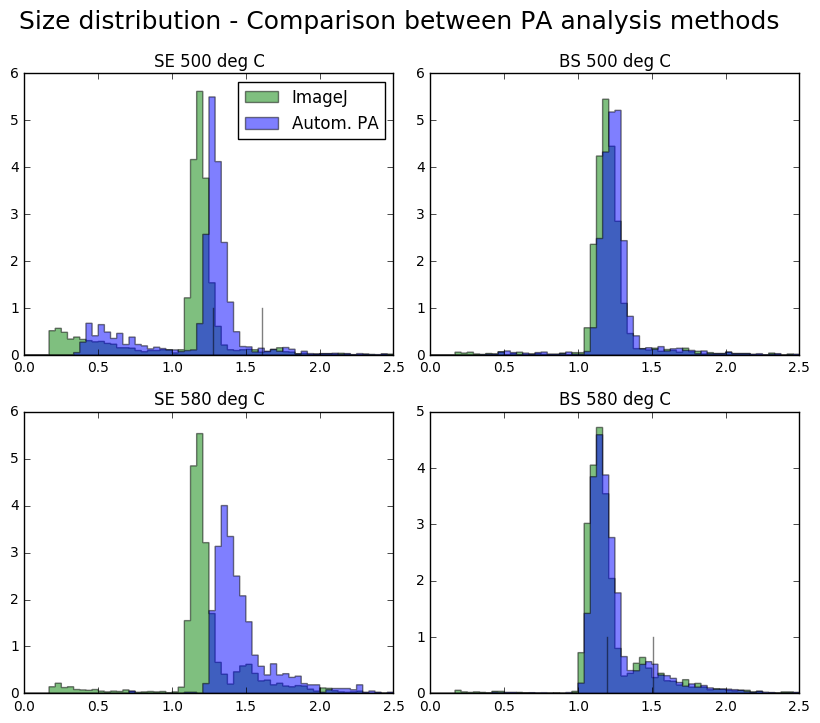

In [13]:
hist_params = {
        'bins': 60,
        'range': (0,2.5),
        'normed': 1,
        'alpha': 0.5,
        'histtype': 'stepfilled'
}

def addmaxlines(frame, pos):
    frame.plot([pos,pos],[0,1], color ='black', alpha = 0.5, linewidth=1.0, linestyle="-")

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

# SE 500 deg C

n = ax0.hist([df_500_SE.AvgDiam.dropna().values,
         df_IJ500_SE.AvgDiam.dropna().values],
         label = ['Autom. PA', 'ImageJ'],
         **hist_params)

# find the modal of the distribution
#modal, count = stats.mode(df_500_SE.AvgDiam.dropna().values)
#add a line in the plot for modal and modal * power(2,1./3)
addmaxlines(ax0, np.median(df_500_SE.AvgDiam.dropna().values))
addmaxlines(ax0, np.median(df_500_SE.AvgDiam.dropna().values) * np.power(2,1./3))


ax0.set_title('SE 500 deg C')
ax0.legend()


# BS 500 deg C

ax1.hist([df_500_BS.AvgDiam.dropna().values,
         df_IJ500_BS.AvgDiam.dropna().values],
         **hist_params)
ax1.set_title('BS 500 deg C')

# SE 580 deg C

ax2.hist([df_580_SE[df_580_SE.UM > 0].AvgDiam.values,
         df_IJ580_SE.AvgDiam.dropna().values],
         **hist_params)
ax2.set_title('SE 580 deg C')

# BS 580 deg C

ax3.hist([df_580_BS.AvgDiam.dropna().values,
         df_IJ580_BS.AvgDiam.dropna().values],
         **hist_params)
ax3.set_title('BS 580 deg C')

#add a line in the plot for modal and modal * power(2,1./3)
addmaxlines(ax3, np.median(df_IJ580_SE.AvgDiam.dropna().values))
addmaxlines(ax3, np.median(df_IJ580_SE.AvgDiam.dropna().values) * np.power(2,1./3))

# axes labels, ticks, etc...


fig.subplots_adjust(hspace = 0.2, wspace = 0.1)
fig.suptitle('Size distribution - Comparison between PA analysis methods', fontsize = 18)
fig.set_figheight(8)
fig.set_figwidth(10)

## Check if the particles detected with SE 500 deg C with diameters < 1 µm contain uranium

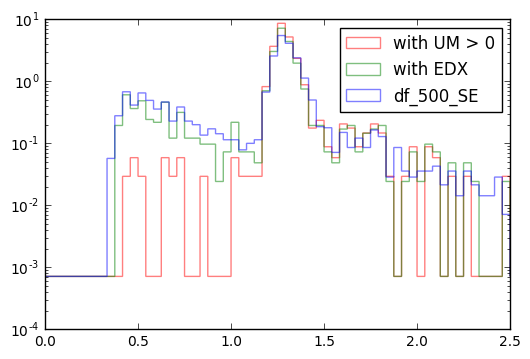

In [14]:
data1 = df_500_SE.AvgDiam.dropna().values
data2 = df_500_SE[df_500_SE.SiK > 0].AvgDiam.dropna().values
data3 = df_500_SE[(df_500_SE.UM > 0)].AvgDiam.dropna().values
plt.hist([data1, data2, data3],
         label = ['df_500_SE', 'with EDX','with UM > 0'],
         bins = 60,
         range = (0,2.5),
         normed =  1,
         alpha = 0.5,
         histtype = 'step',
         log = True
        )
plt.legend()
plt.show()

### Findings from Comparison

    * For the SE images there is a notable shift in the size distribution, where the ImageJ analysis yields smaller diameters than the automated PA analysis.
    * For BS images there is a much smaller shift of the distribution. Such a small shift may be caused by a difference in the pixelsize assumed in image processing.
    * The analysis of SE images at 580 has a substantial fraction of particles with diameters < 1 µms, which do not contain Uranium. The PA analysis for SE images at 580 degrees leads to a significant rate of false detection of particles. Since the automated PA search routine is not supervised, the ImageJ processing is prefered as more acurate.

## Plot Comparison between SEM and BS for Image J

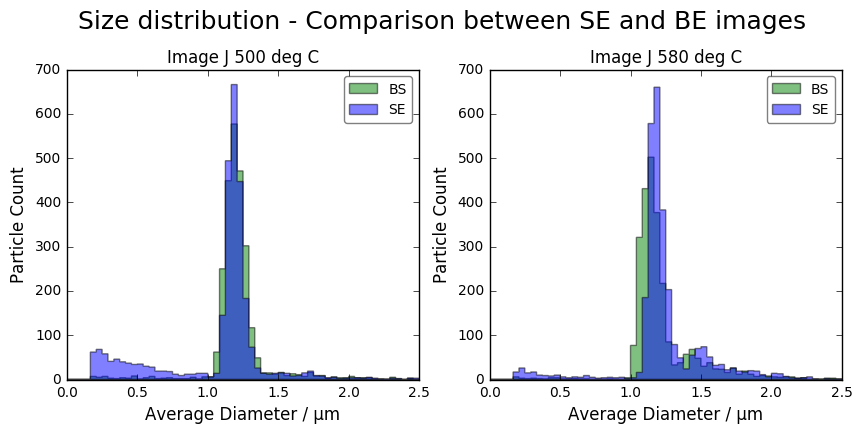

In [15]:
# Fontsize

fs = 12

hist_params = {
        'bins': 60,
        'range': (0,2.5),
        'normed': 0,
        'alpha': 0.5,
        'histtype': 'stepfilled'
}

legend_params = {
    'loc': 'best',
    'fancybox' : True,
    'framealpha' : 0.5,
    'fontsize' : 10    
}

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

# IJ 500 deg C

ax0.hist([df_IJ500_SE.AvgDiam.dropna().values,
         df_IJ500_BS.AvgDiam.dropna().values],
         label = ['SE', 'BS'],
         **hist_params)
ax0.set_title('Image J 500 deg C')
ax0.legend(** legend_params)

# IJ 580 deg C

ax1.hist([df_IJ580_SE.AvgDiam.dropna().values,
         df_IJ580_BS.AvgDiam.dropna().values],
         label = ['SE', 'BS'],
         **hist_params)
ax1.set_title('Image J 580 deg C', fontsize = fs)
ax1.legend(** legend_params)

# axes labels, ticks, etc...
for ax in axes:
    ax.set_xlabel('Average Diameter / µm', fontsize = fs)
    ax.set_ylabel('Particle Count', fontsize = fs)

fig.subplots_adjust(hspace = 0.2, wspace = 0.2)
fig.suptitle('Size distribution - Comparison between SE and BE images', fontsize = 18, y = 1.05)
fig.set_figheight(4)
fig.set_figwidth(10)

    * For ImageJ particle analysis, the difference between the size distributions obtained from SE and BS images is mainly in a shift observed at 580 deg C.
    * PA on SE Images captures small diameter particles for 500 deg C.
    * The rise in particle count at lower diameters < 0.7 µm results from particle detection without uranium

It can be concuded, that at 
    * The particle analysis on SE images is the preferred method, in particular in view of analyzing the external morphology

    * 580 deg C the size distribution is bimodal with a second population of larger particles. The average diameter of the second population has a median value close to the third square root of 2. This gives an indication that the second population represent double particle agglomerates.

## Direct comparison of size distributions 500 deg and 580 deg

This will be the figure in the publication

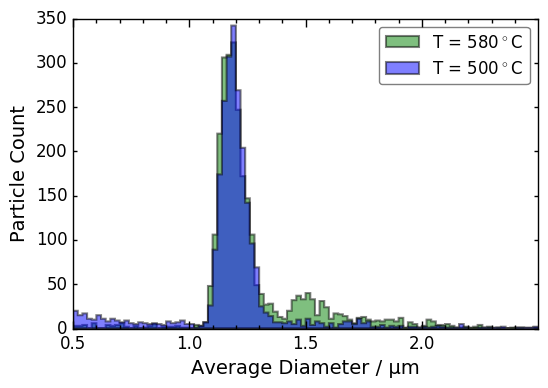

In [17]:
#fontsize
fs = 14

data1 = df_IJ500_SE.AvgDiam.dropna().values
data2 = df_IJ580_SE.AvgDiam.dropna().values

figp, ax = plt.subplots(1)

ml = MultipleLocator(5)

ax.hist([data1, data2],
         label = ['T = 500$^\circ$C', 'T = 580$^\circ$C'],
         bins = 100,
         range = (0.5,2.5),
         normed =  0,
         alpha = 0.5,
         histtype = 'stepfilled',
         lw = 1.5
        )
# axes labels, ticks, etc...

ax.set_xlabel('Average Diameter / µm', fontsize=fs)
ax.set_ylabel('Particle Count', fontsize=fs)
ax.set_xticks(np.arange(0.5,2.5,0.5))
ax.xaxis.set_minor_locator(ml)
ax.tick_params(axis='x', which = 'minor', bottom= 'on', top = 'on', 
               direction = 'in', width =1, length = 3)
ax.tick_params(axis='x', which = 'major', width=1, length = 6, labelsize = 12)

ax.tick_params(axis='y', which = 'minor', left= 'off', right = 'off')
ax.tick_params(axis='y', which = 'major', direction='in', width=1, length = 3, labelsize = 12)

ax.legend(loc='best', fancybox=True, framealpha=0.5, fontsize = 12)
plt.minorticks_on()

plt.figure(figsize = (3.5,2.5))
figp.savefig(path+directory_SE+'size_distr_SE.png',dpi=600)
plt.show()


In [25]:
df_IJ580_SE.shape

(11188, 21)

In [40]:
np.median(df_IJ580_SE.AvgDiam.dropna().values) * np.power(2,1./3)

1.5081715038342818

In [48]:
np.median(df_IJ580_SE.AvgDiam[(df_IJ580_SE.AvgDiam > 1.4) & (df_IJ580_SE.AvgDiam < 1.6)])

1.499847870345

## Exploring the Particle Shapes of the Bimodal population

#### We classify the particles in four categories:

1. the main population of monodisperse particle

2. double droplet particles or completely fused particles

3. two-agglomerate particles

4. large size particles: bloated particles, multiagglomerates, dust, etc


In [27]:
# the bins to categorize the AvgDiam (µm)
d_0, d_1, d_2, d_3, d_4 = 0, 1.0 ,1.4, 1.6, 5

# the bins to categorize the Circ
c_0, c_1, c_2 = 0, 0.75, 1

In [28]:
# use pandas categorical index and pd.cut function
# the four (4) size categories of AvgDiam are
# debris, SD: single droplet, DD: double droplet, L: large particles
#
# the two (2) circularity categories are
# round and irregular

labels_size = ['debris', 'SD', 'DD', 'L']
labels_circularity = ['irregular', 'round']

df_IJ500_SE['sizecategory']=pd.cut(df_IJ500_SE.AvgDiam, (d_0,d_1,d_2,d_3,d_4),
       labels = labels_size
      )

df_IJ580_SE['sizecategory']=pd.cut(df_IJ580_SE.AvgDiam, (d_0,d_1,d_2,d_3,d_4),
       labels = labels_size
      )

df_IJ500_SE['circcategory']=pd.cut(df_IJ500_SE.Circ, (c_0, c_1, c_2),
       labels = labels_circularity
      )

df_IJ580_SE['circcategory']=pd.cut(df_IJ580_SE.Circ, (c_0, c_1, c_2),
       labels = labels_circularity
      )

### First we make a scatter plot of the size distribution vs shape at the two temperatures

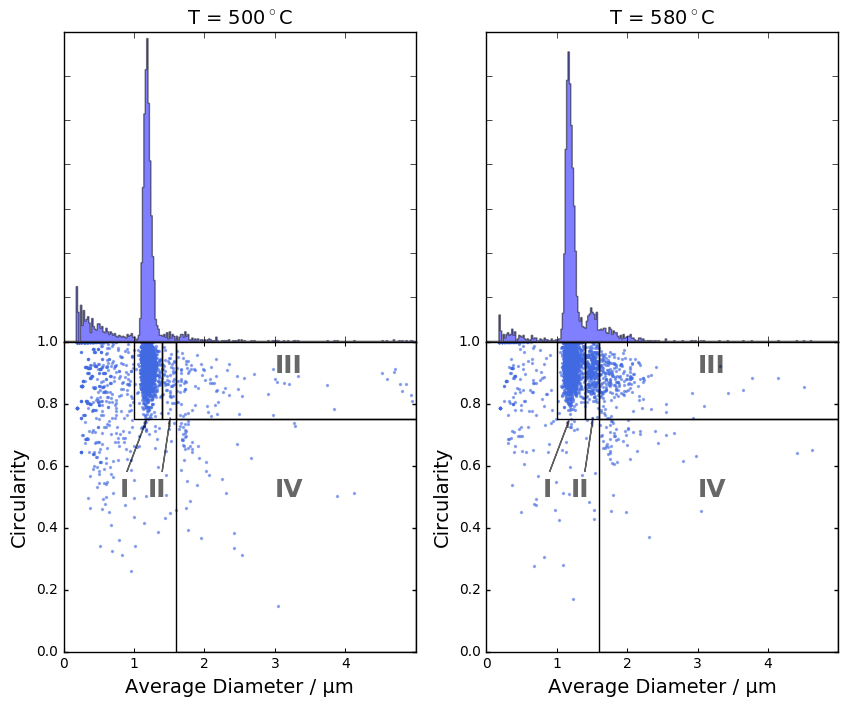

In [36]:
hist_params = {
        'bins': 250,
        'range': (0,5),
        'normed': 0,
        'alpha': 0.5,
        'histtype': 'stepfilled'
}

scatter_params = {
        's' : 2,
        'alpha' : 0.5,
        'color' : 'royalblue'
}

patch_params = {
        'facecolor' : 'none',
}

text_params = {
        'fontsize' : 18,
        'weight': 'bold',
        'alpha' : 0.6
}

ml = MultipleLocator(10)

x1 = df_IJ500_SE.AvgDiam.dropna().values
y1 = df_IJ500_SE.Circ.dropna().values

x2 = df_IJ580_SE.AvgDiam.dropna().values
y2 = df_IJ580_SE.Circ.dropna().values

fig, axes = plt.subplots(nrows=2, ncols=2)

ax0, ax1, ax2, ax3 = axes.flatten()

# Plot the histograms
ax0.hist(x1,**hist_params)

ax1.hist(x2,**hist_params)

ax2.scatter(x1,y1, **scatter_params)

ax3.scatter(x2,y2, **scatter_params)


for axis in [ax2, ax3]:
    # patch cat I
    axis.add_patch(patches.Rectangle((d_1,c_1), d_2-d_1, c_2-c_1, **patch_params))

    # patch cat II
    axis.add_patch(patches.Rectangle((d_2,c_1), d_3-d_2, c_2-c_1, **patch_params))

    # patch cat III
    axis.add_patch(patches.Rectangle((d_3,c_1), d_4-d_3, c_1-c_0, **patch_params))    
    
    # patch cat IV    
    axis.add_patch(patches.Rectangle((d_3,c_0), d_4-d_3, c_1-c_0, **patch_params))  
    
    axis.set_xticks(np.arange(0,5,1))
    axis.xaxis.set_minor_locator(ml)
    axis.tick_params(axis='x', which = 'minor', bottom= 'on', top = 'on', 
                   direction = 'in', width =0.75, length = 3)
    axis.tick_params(axis='x', which = 'major', width=0.75, length = 3)

    axis.tick_params(axis='y', which = 'minor', left= 'off', right = 'off')
    axis.tick_params(axis='y', which = 'major', direction='in', width=1, length = 3)
    
    axis.set_xlim(0,5)
    axis.set_ylim(0,1)
    
    axis.set_xlabel('Average Diameter / µm', fontsize=fs)
    axis.set_ylabel('Circularity', fontsize=fs)
    
    # Add the annotation of the four categories
    axis.text(0.8,0.5, 'I', **text_params)
    axis.text(1.2,0.5, 'II', **text_params)
    axis.text(3,0.9, 'III', **text_params)
    axis.text(3,0.5, 'IV', **text_params)
    axis.arrow(0.9, 0.58, 0.25, 0.15, alpha = 0.6)
    axis.arrow(1.4, 0.58, 0.1, 0.15, alpha = 0.6)

ax0.set_title('T = 500$^\circ$C', fontsize = fs)
ax1.set_title('T = 580$^\circ$C', fontsize = fs)   



# hide the x ticks for top plots and the y ticks 
plt.setp([a.get_xticklabels() for a in axes[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axes[0, :]], visible=False)

fig.subplots_adjust(hspace=0) 

fig.set_figheight(8)
fig.set_figwidth(10)

#plt.savefig(path+directory_SE + 'shape_categories.png',dpi=600)

In [30]:
stat_500 = df_IJ500_SE.groupby(['sizecategory', 'circcategory']).describe().AvgDiam
stat_580 = df_IJ580_SE.groupby(['sizecategory', 'circcategory']).describe().AvgDiam

In [8]:
# grab the counts of the categorized dataframe
count_500 = stat_500.loc[(slice(None)), (slice(None)),'count']
count_580 = stat_580.loc[(slice(None)), (slice(None)),'count']

NameError: name 'stat_500' is not defined

In [9]:
#Create a dictionary of category statistics
cat_index = ['I', 'II', 'III', 'IV']
cat_stat = pd.DataFrame(
            {'500 deg' : pd.Series([
                                #cat_i 
                                count_500.loc['SD','round'],
                                #cat_ii
                                count_500.loc['DD','round'],
                                #cat_iii
                                count_500.loc['L','round'],
                                #cat_iv
                                count_500.loc['L','irregular'],                                
                                ],
                            index = cat_index
            ),
            '580 deg' : pd.Series([
                                #cat_i 
                                count_580.loc['SD','round'],
                                #cat_ii
                                count_580.loc['DD','round'],
                                #cat_iii
                                count_580.loc['L','round'],
                                #cat_iv
                                count_580.loc['L','irregular']
                                ],
                            index = cat_index
            )
           }
)

NameError: name 'pd' is not defined

In [10]:
# Calculate the Percentage and add as column
cat_stat['500 deg_perc'] = cat_stat['500 deg'] / cat_stat['500 deg'].sum() *100
cat_stat['580 deg_perc'] = cat_stat['580 deg'] / cat_stat['580 deg'].sum() *100

NameError: name 'cat_stat' is not defined

In [25]:
cat_stat

,500 deg,580 deg,500 deg_perc,580 deg_perc
I,2036.0,2183.0,91.259525,80.583241
II,54.0,230.0,2.420439,8.490218
III,92.0,230.0,4.123711,8.490218
IV,49.0,66.0,2.196325,2.436323


# Load Example images from each category

In [26]:
import skimage
from skimage import io

In [27]:
def loadthumbs_selection(part_ids, thumb_path, *ext):
    # loads the images from thumbpaths with the part_ids
    # returns an np.array of concatenated images
    
    def make_pathsfromlistentry(directory, listentry, extension):
        return directory + '{:0>5d}'.format(listentry) + extension

    # create the file list        
    filelist = [make_pathsfromlistentry(thumb_path, int(i), '.png') for i in part_ids]
    
    # load images into a scikit.io imagecollection
    coll = io.imread_collection(filelist)
    
    # convert the collection into a list of images and concatenate into a np.array    
    allimgs = np.concatenate([img for img in coll], axis = 1)
    
    return allimgs

### Thumbnails (20) for 500 deg SE PA data

In [88]:
thumbpath = path + directory_SE + 'stub02/IJselect/'

In [92]:
particles_cati = df_IJ500_SE[(df_IJ500_SE.sizecategory == 'SD') & (df_IJ500_SE.circcategory == 'round')].sample(20).id.values

particles_catii = df_IJ500_SE[(df_IJ500_SE.sizecategory == 'DD') & (df_IJ500_SE.circcategory == 'round')].sample(20).id.values

particles_catiii = df_IJ500_SE[(df_IJ500_SE.sizecategory == 'L') & (df_IJ500_SE.circcategory == 'round')].sample(20).id.values

particles_cativ = df_IJ500_SE[(df_IJ500_SE.sizecategory == 'L') & (df_IJ500_SE.circcategory == 'irregular')].sample(20).id.values

In [93]:
# grab the images

thumbs_cati = loadthumbs_selection(particles_cati, thumbpath)

thumbs_catii = loadthumbs_selection(particles_catii, thumbpath)

thumbs_catiii = loadthumbs_selection(particles_catiii, thumbpath)

thumbs_cativ = loadthumbs_selection(particles_cativ, thumbpath)

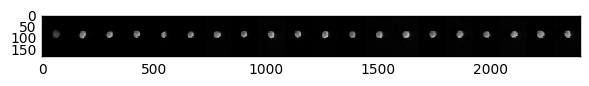

In [94]:
io.imshow(thumbs_cati)

In [95]:
#io.imsave(path + directory_SE + 'SE_500_thumbs_cati.png',thumbs_cati)

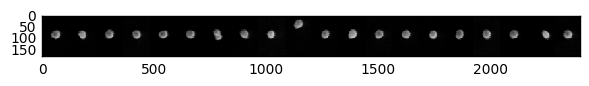

In [96]:
io.imshow(thumbs_catii)

In [97]:
#io.imsave(path + directory_SE + 'SE_500_thumbs_catii.png',thumbs_catii)

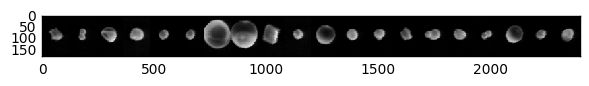

In [98]:
io.imshow(thumbs_catiii)

In [99]:
#io.imsave(path + directory_SE + 'SE_500_thumbs_catiii.png',thumbs_catiii)

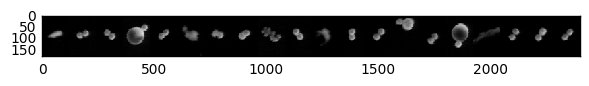

In [100]:
io.imshow(thumbs_cativ)

In [101]:
#io.imsave(path + directory_SE + 'SE_500_thumbs_cativ.png',thumbs_cativ)

### Thumbnails (20) for 580 deg SE PA data

In [102]:
thumbpath = path + directory_SE + 'stub01/IJselect/'

In [103]:
particles_cati = df_IJ580_SE[(df_IJ580_SE.sizecategory == 'SD') & (df_IJ580_SE.circcategory == 'round')].sample(20).id.values

particles_catii = df_IJ580_SE[(df_IJ580_SE.sizecategory == 'DD') & (df_IJ580_SE.circcategory == 'round')].sample(20).id.values

particles_catiii = df_IJ580_SE[(df_IJ580_SE.sizecategory == 'L') & (df_IJ580_SE.circcategory == 'round')].sample(20).id.values

particles_cativ = df_IJ580_SE[(df_IJ580_SE.sizecategory == 'L') & (df_IJ580_SE.circcategory == 'irregular')].sample(20).id.values

In [104]:
# grab the images

thumbs_cati = loadthumbs_selection(particles_cati, thumbpath)

thumbs_catii = loadthumbs_selection(particles_catii, thumbpath)

thumbs_catiii = loadthumbs_selection(particles_catiii, thumbpath)

thumbs_cativ = loadthumbs_selection(particles_cativ, thumbpath)

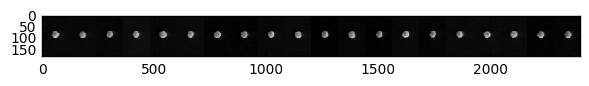

In [105]:
io.imshow(thumbs_cati)

In [112]:
#io.imsave(path + directory_SE + 'SE_580_thumbs_cati.png',thumbs_cati)

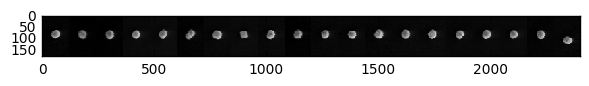

In [113]:
io.imshow(thumbs_catii)

In [114]:
#io.imsave(path + directory_SE + 'SE_580_thumbs_catii.png',thumbs_catii)

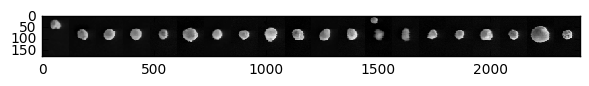

In [115]:
io.imshow(thumbs_catiii)

In [116]:
#io.imsave(path + directory_SE + 'SE_580_thumbs_catiii.png',thumbs_catiii)

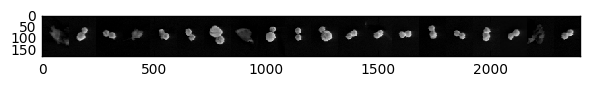

In [117]:
io.imshow(thumbs_cativ)

In [118]:
#io.imsave(path + directory_SE + 'SE_580_thumbs_cativ.png',thumbs_cativ)